Your name: Han Tran

Your matriculation number: 2001708

In [2]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# QUESTION 1

(15 points) In this exercise, you will perform tasks faced by a data analyst working with data from a bike
sharing platform (’bike data.csv’). Your job is to build a predictive model to estimate demand for bicycles
at different locations using the following information (one row in the data is for one day of the year):

• season: the season of the observaton (1: winter, 2: spring, 3: summer, 4: fall)

• month : the year of the month (1 to 12, from January to December)

• holiday : whether the day is holiday or not (extracted from [Web Link])


• day: day of the month (1-31)


• weekday : day of the week (1 to 7)


• workingday : 1, if day is neither weekend nor holiday is 1, and 0 otherwise


• weather: weather conditions (1: clear, partly cloudy; 2: cloudy, light rain; 3: thunderstorm, light
snow)


• temp : temperature in Celsius


• hum: humidity


• wind: wind speed


• registered: total number of registered users checking the platform app within the day


• cnt: count of total rental bikes during the day

In [3]:
# Import the dataset
bike_data=pd.read_csv('bike_data.csv')
bike_data

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,65.2917,23.458911,90698,2114,27
726,1,12,0,6,1,2,10.386653,59.0000,10.416557,119069,3095,28
727,1,12,0,7,0,2,10.386653,75.2917,8.333661,57421,1341,29
728,1,12,0,1,0,1,10.489153,48.3333,23.500518,69566,1796,30


a) Exploratory data analysis: try to understand the different variables in the data. 

- Identify the variables,
based on exploratory data analysis methods, that you think have an effect on the count of rental
bikes needed.

In [4]:
bike_data.head()

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1


As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.
- Binary Types : Year, holiday, workingday
- Categorical Types: Season, Month, weekday, Weather
Numeric types: temp, atemp, Humidity, windspeed, Count

In [5]:
#Check the missing values before fit into the models
# We dont have any missing values
bike_data.isnull().sum()

season        0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
hum           0
wind          0
registered    0
cnt           0
day           0
dtype: int64

- Create visualizations that show the relationship
between ’cnt’ and the other variables (create at least 4 plots, you are free to create more if you think
it can help in understating the problem)

In [6]:
# Check the correlation among variables
bike_data.corr()

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
season,1.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.410310,0.404584,0.153528
month,0.831032,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.291952,0.278191,0.166910
holiday,-0.010868,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.109142,-0.068764,0.004536
weekday,-0.003081,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.057427,0.067534,0.000190
workingday,0.013762,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.305437,0.062542,0.000484
weather,0.021306,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.259025,-0.295929,-0.011018
temp,0.333361,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.539436,0.627044,0.081898
hum,0.208220,0.224937,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.089212,-0.098543,0.096106
wind,-0.229607,-0.208013,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.217915,-0.235132,-0.027370
registered,0.410310,0.291952,-0.109142,0.057427,0.305437,-0.259025,0.539436,-0.089212,-0.217915,1.000000,0.945411,0.040821


<AxesSubplot:>

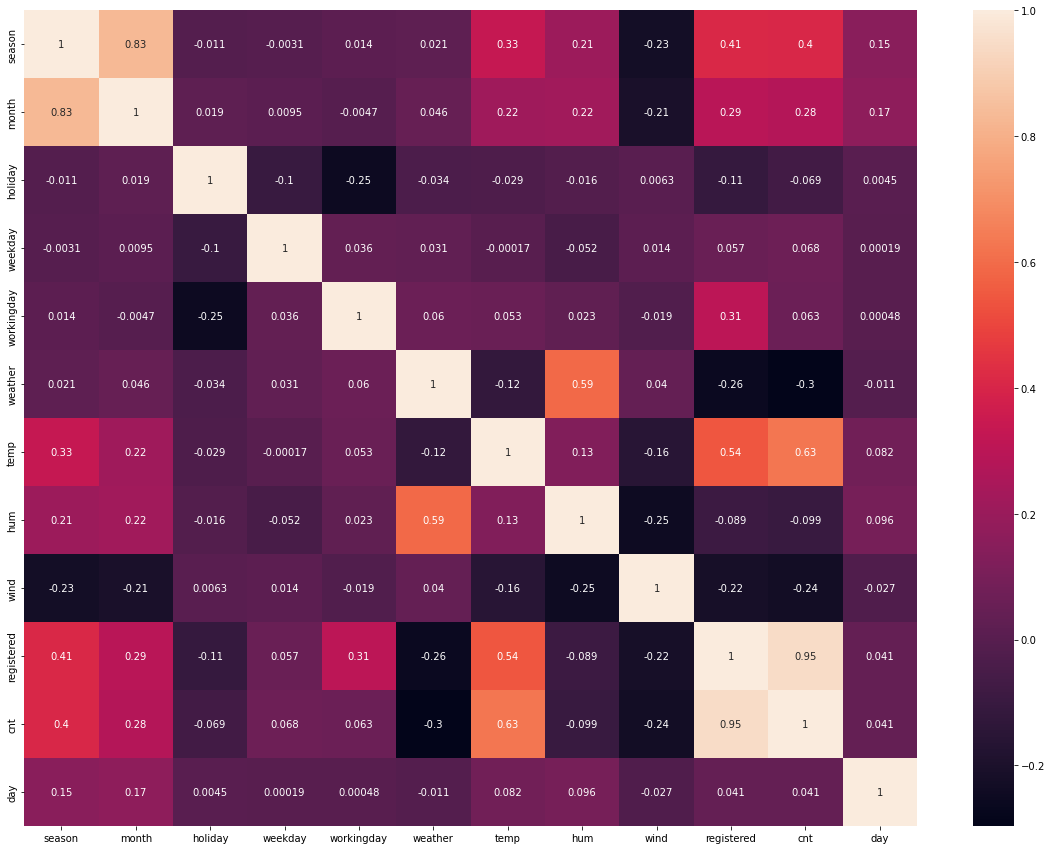

In [7]:
# I created the heatmap to see the correlation among variables
# Because we only need to check what variables affects on the cnt(count of total rental bikes during the day), we will need to see the correlation between cnt with other variable.
plt.figure(figsize=(20, 15))

sns.heatmap(bike_data.corr(), annot= True)

As we can see in the map, the registered and cnt seems to be the highest correlation compared with others. However, because there are not many high correlation values other than that, I will still use this variable

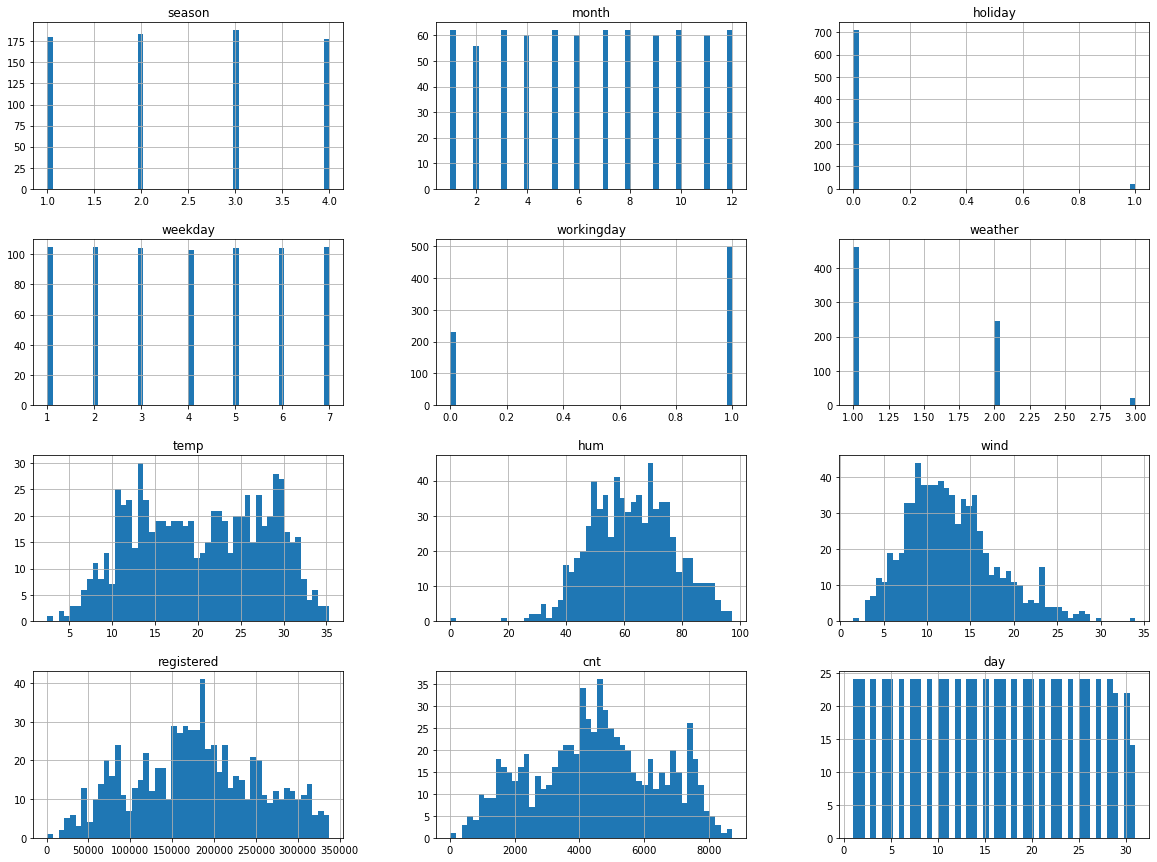

In [8]:
bike_data.hist(bins=50, figsize=(20,15))
plt.savefig('Plots')
plt.show()

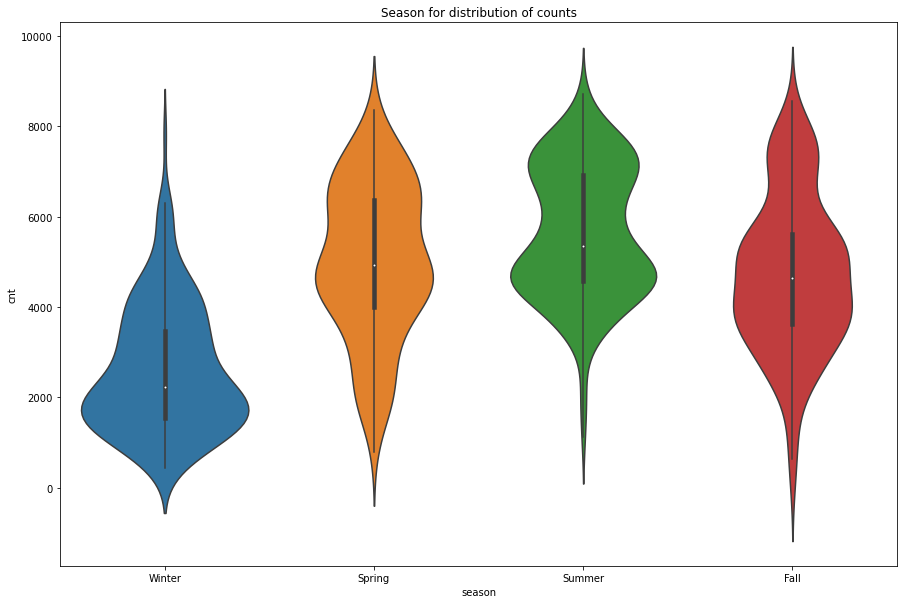

In [9]:
#Seasonlist: 
# 1: Winter
# 2: Spring
# 3: Summer
# 4: Fall

bike_data['season'] = bike_data['season'].map({1:"Winter",
                                                 2:'Spring',3:'Summer',4:'Fall'})

fig,ax=plt.subplots(figsize=(15,10))
#Violin plot for yearly distribution of counts
sns.violinplot(x='season',y='cnt',data=bike_data[['season','cnt']])
ax.set_title('Season for distribution of counts')
plt.show()

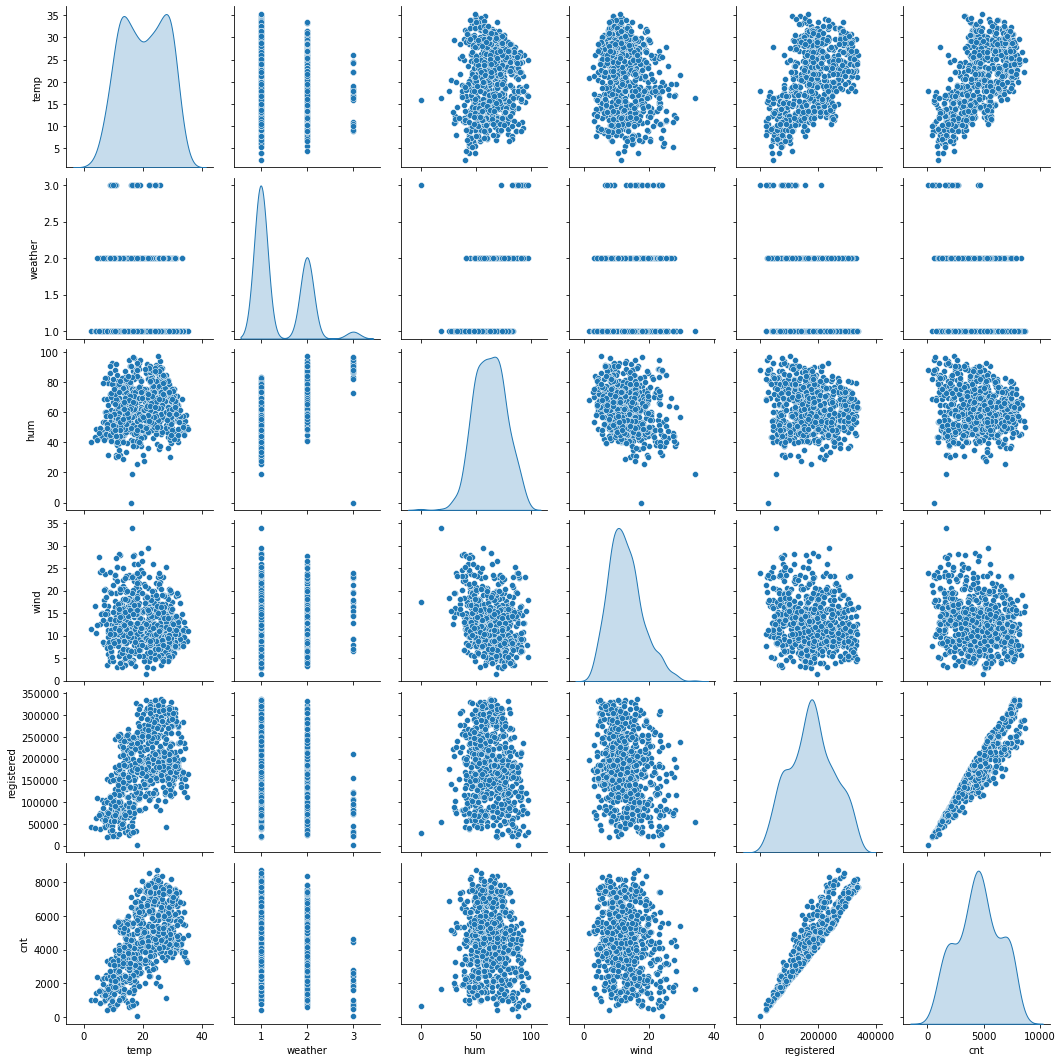

In [10]:
bike_new=bike_data[[ 'temp', 'weather', 'hum', 'wind','registered','cnt']]
sns.pairplot(bike_new, diag_kind='kde')
plt.show()

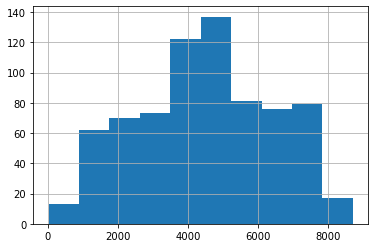

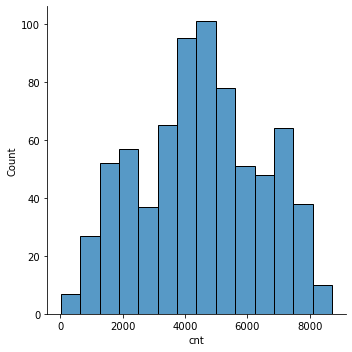

In [11]:
#Create the histogram plot for column Cnt (count of total rental bikes during the day)
bike_data.cnt.hist()
# Distribution of bike 
sns.displot(bike_data.cnt)

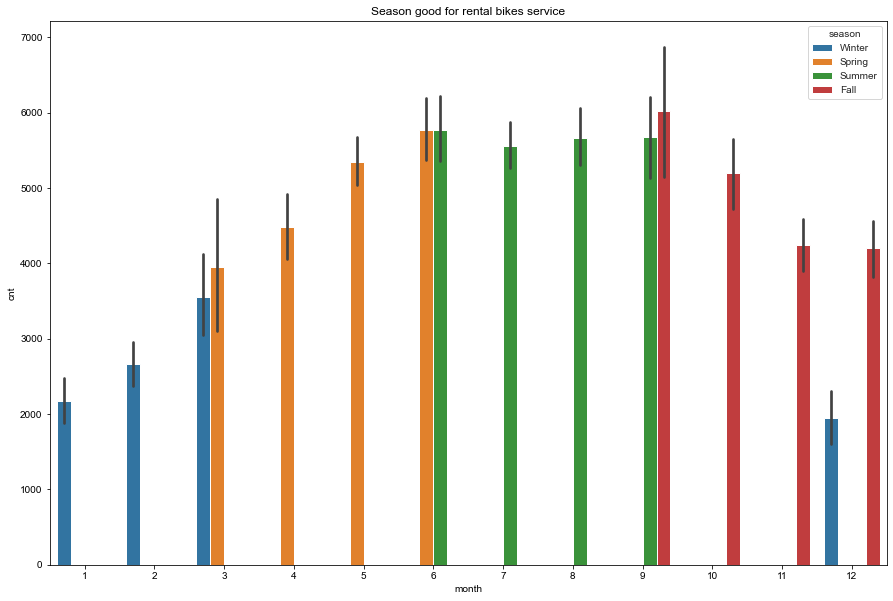

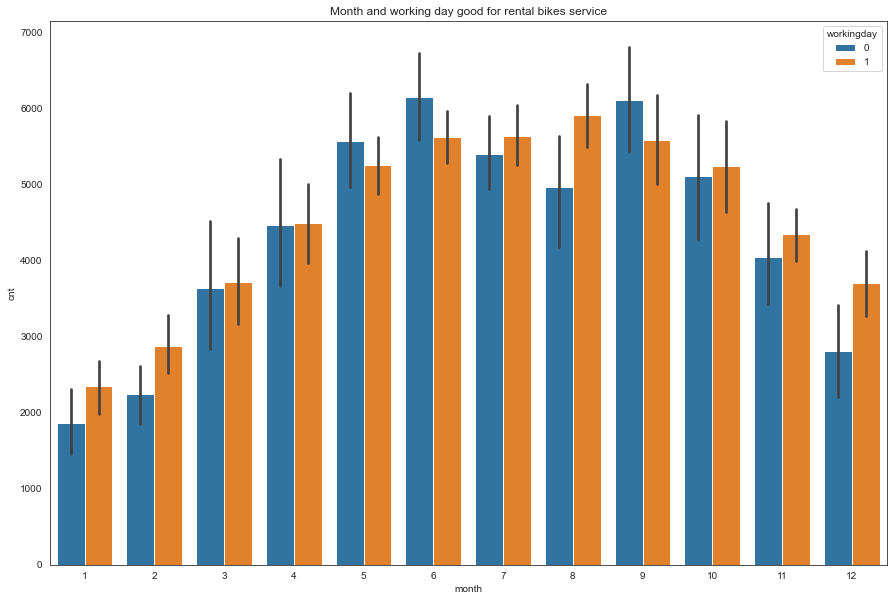

Text(0.5, 1.0, 'Season and weather and holiday for distribution of counts')

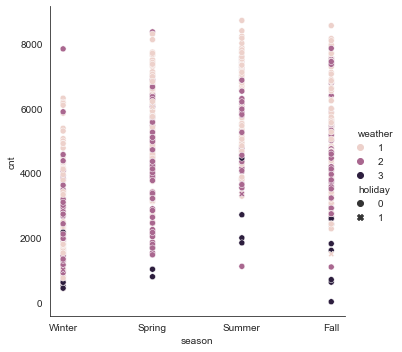

In [12]:
#Bar plot for good Cnt (count of total rental bikes during the day)
fig,ax=plt.subplots(figsize=(15,10))
sns.set_style('white')
sns.barplot(x = 'month',y = 'cnt',data=bike_data[['month','cnt','season']],hue='season', ax = ax)
ax.set_title('Season good for rental bikes service')
plt.show()

#Bar plot for weekday good Cnt (count of total rental bikes during the day)
fig,ax1=plt.subplots(figsize=(15,10))
ax1.set_title('Month and working day good for rental bikes service')
sns.barplot(x='month',y='cnt',data=bike_data[['month','cnt','workingday']],hue='workingday',ax=ax1)
plt.show()

# Four columns in the same figures
sns.relplot(x="season", y="cnt", data=bike_data, kind="scatter", hue = 'weather', style="holiday")
ax.set_title('Season and weather and holiday for distribution of counts')




From the above plots, we can observed that increasing the bike rental count in summer and fall
season and then decreasing the bike rental count in winter and (not whole spring) spring season.

season 1-> winter season 2 -> spring season 3 -> summer season 4 -> fall

Order of Cnt based on season from highest to lowest cnt is:

summer - spring - fall - winter

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


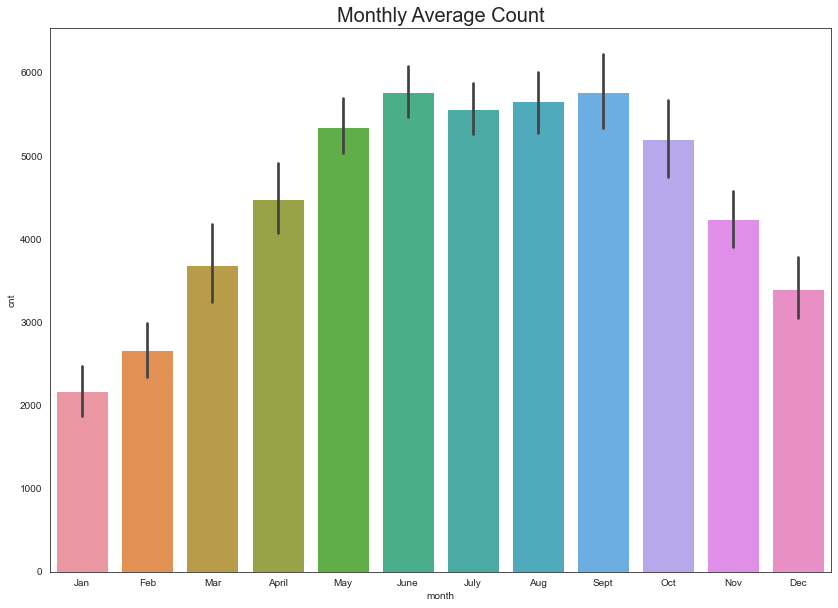

In [13]:
# mapping Month varible proper names for better visibilty

bike_data['month'] = bike_data['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

plt.figure(figsize=[14,10])
sns.barplot(bike_data['month'],bike_data['cnt'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()


RESULT:
More and almost similar average count of rented bikes in August, June, September, July followed by May, October. Company should make sure they prepare with high availability during these months
December, January, February have the least demand probably due to winter season

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


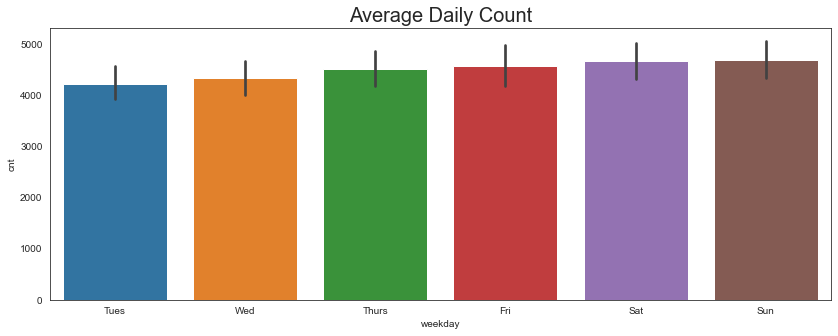

In [14]:
# mapping weekday variable proper names for better visibilty

bike_data['weekday'] = bike_data['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(bike_data['weekday'],bike_data['cnt'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

RESULT:
Looks like all days have similar demands, but still have differences rented bikes count days, which is from low to high:
Mon - Tue - Wed - Thurs - Fri- Sat - Sun

In [15]:
bike_data[['registered', 'cnt', 'season']].groupby(['season']).sum()

,registered,cnt
season,,
Fall,34580662,841613
Spring,34737870,918589
Summer,40566059,1061129
Winter,19867035,469514


Text(0.5, 1.013, 'Comparison between registered and cnt every season')

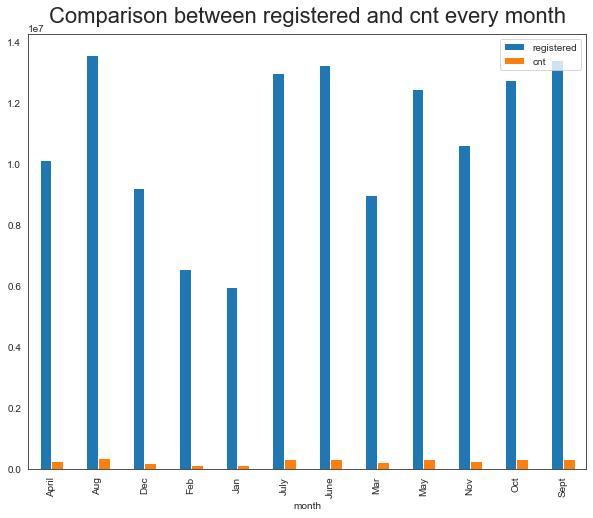

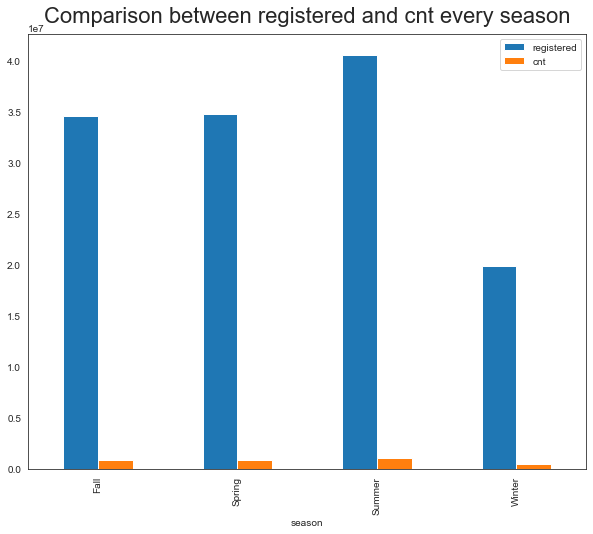

In [16]:
#Comparison of total number of registered users checking the platform app within the day and count of total rental 
#bikes during the day based on every season
reg_cnt_season=bike_data[['registered', 'cnt', 'month']].groupby(['month']).sum()
reg_cnt_season.plot(kind='bar',figsize=(10,8))
plt.title("Comparison between registered and cnt every month", y=1.013, fontsize=22)

#Comparison of total number of registered users checking the platform app within the day and count of total rental 
#bikes during the day based on every season
reg_cnt_season=bike_data[['registered', 'cnt', 'season']].groupby(['season']).sum()
reg_cnt_season.plot(kind='bar',figsize=(10,8))
plt.title("Comparison between registered and cnt every season", y=1.013, fontsize=22)

Terms of Season and month:
registered (total number of registered users checking the platform app within the day)
cnt (count of total rental bikes during the day)

--> The total number of registered users checking the platform app within the day is higher than the total rental bikes during the day

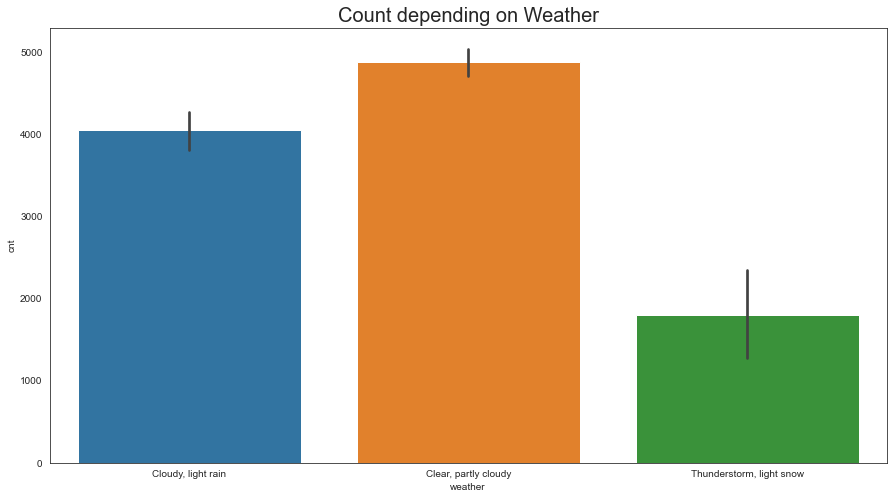

In [17]:
#weathersit : 
# 1: Clear, partly cloudy
# 2: Cloudy, light rain
# 3: Thunderstorm, light snow

bike_data['weather'] = bike_data['weather'].map({1:"Clear, partly cloudy",
                                                 2:'Cloudy, light rain',3:'Thunderstorm, light snow'})
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather',y='cnt',data=bike_data[['month','cnt','weather']],ax=ax1)
ax1.set_title('Count depending on Weather' , fontsize = 20)
plt.show()

Weather: weather conditions (1: clear, partly cloudy; 2: cloudy, light rain; 3: thunderstorm, light
snow)

Result: Total rental bikes during the day is high with Clear weather, then cloudy, low when weather has thunderstorm, light
snow

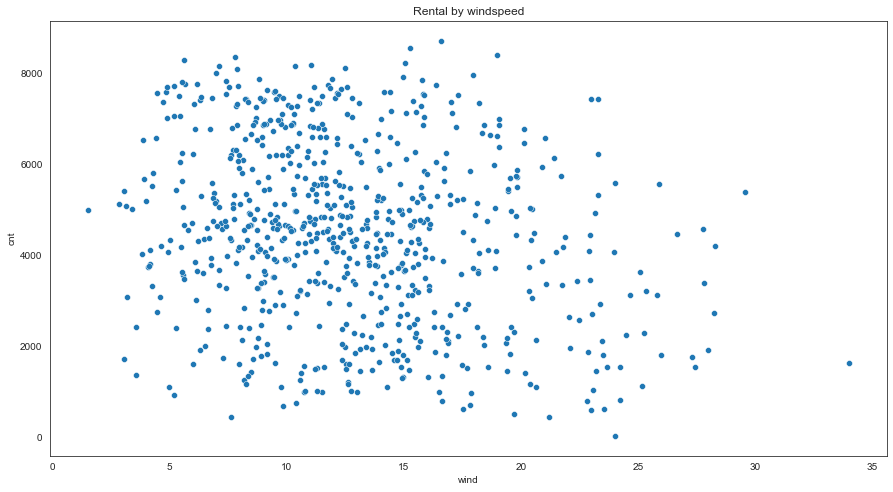

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday and distribution of counts
sns.scatterplot(x = 'wind' , y = 'cnt', data = bike_data)
ax.set_title('Rental by windspeed')
plt.show()



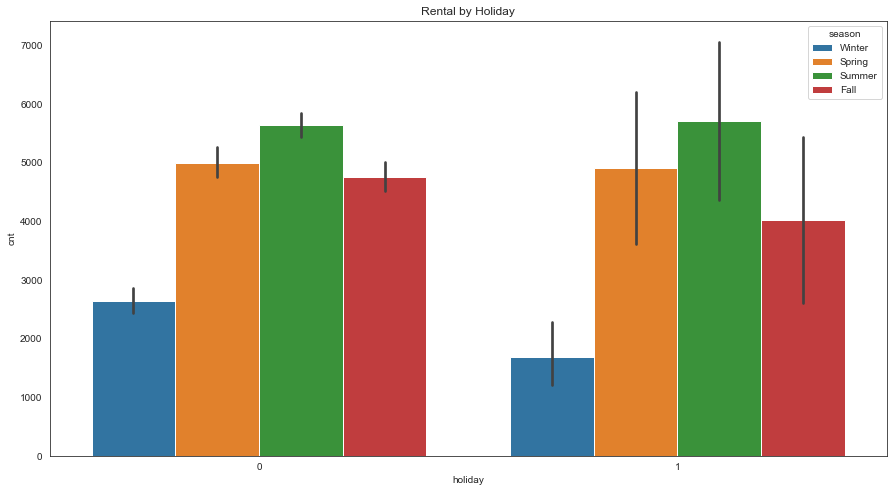

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday and distribution of counts
sns.barplot(data=bike_data,x='holiday',y='cnt',hue='season')
ax.set_title('Rental by Holiday')
plt.show()


From the above bar plot, the illustration that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

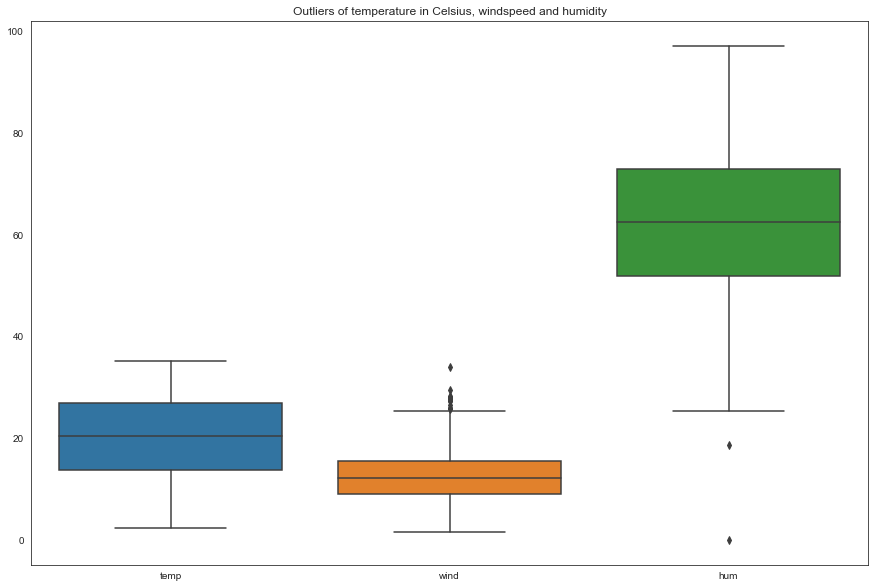

In [20]:
# Check outliers of temperature in Celsius, windspeed and humidity
fig,ax=plt.subplots(figsize=(15,10))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_data[['weather', 'temp','wind','hum']])
ax.set_title('Outliers of temperature in Celsius, windspeed and humidity')
plt.show()


From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable

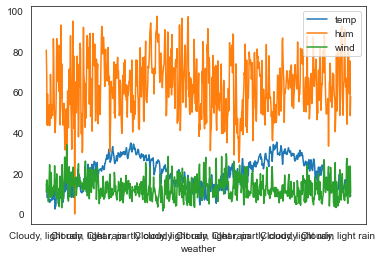

In [21]:
import matplotlib.pyplot as plt
bike_data.plot(x="weather", y=["temp", "hum", "wind"])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


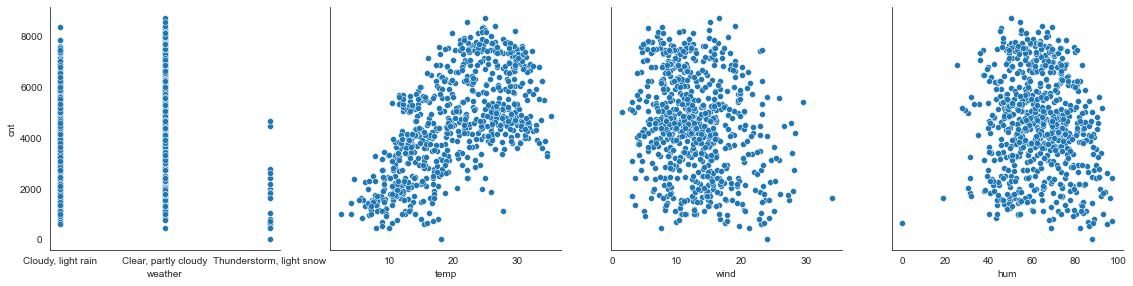

In [22]:
# linear relation between weather, temp, atemp with cnt
sns.pairplot(bike_data, x_vars=['weather', 'temp','wind','hum'], y_vars='cnt',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

#Graph 2
- **as can be seen from above plots, there is some linear relation between weather, temp, atemp with cnt.**
- **this shows that we can do linear regression for solving the problem.**

Text(0.5, 1.0, 'Rental Bikes by Weekday')

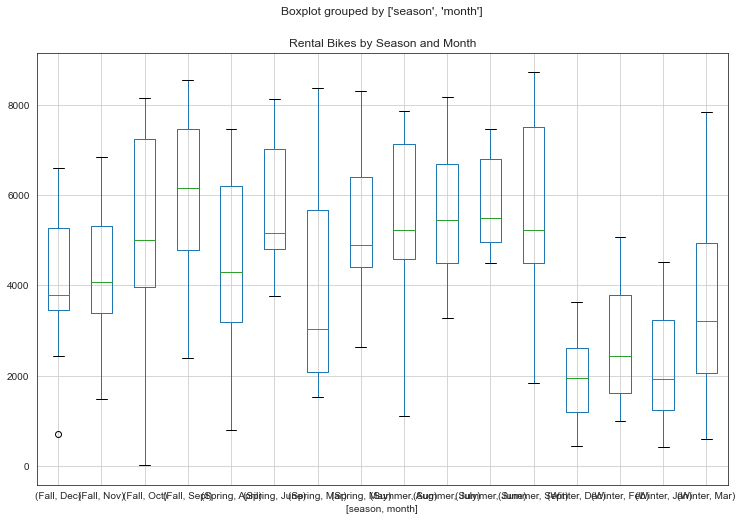

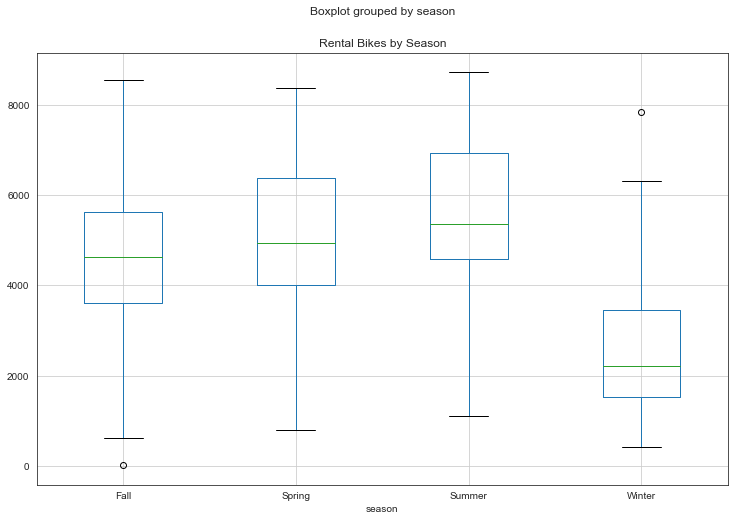

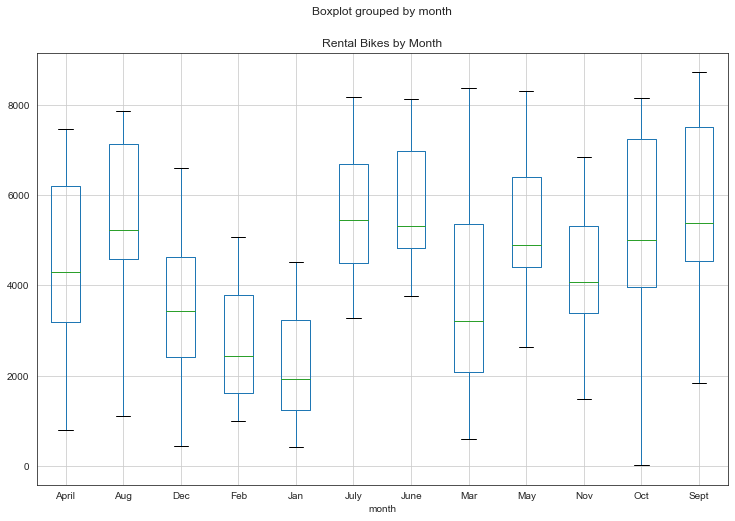

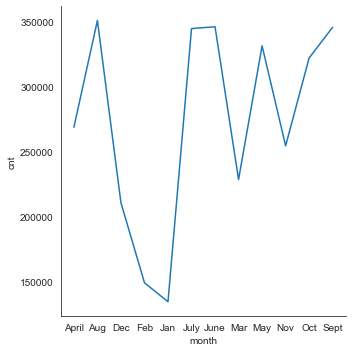

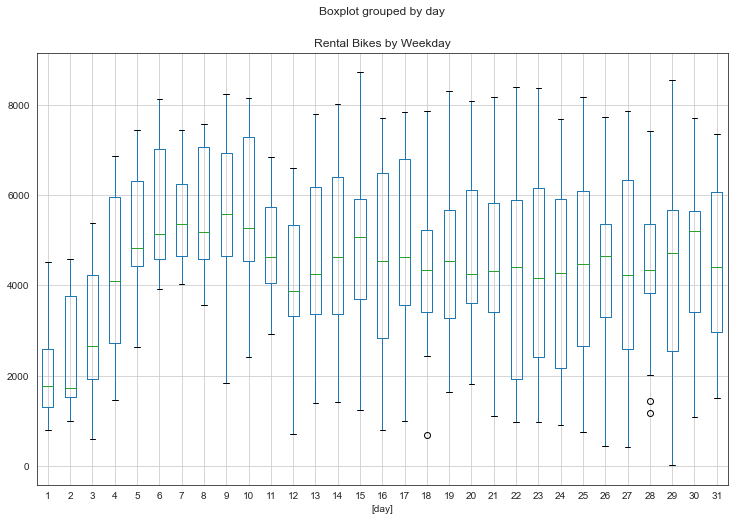

In [23]:
# Rental Bikes by Season and Year
bike_data.boxplot(by=['season','month'], column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Season and Month")

# Bike rented by Season
bike_data.boxplot(by='season', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Season")

# Bike rented by Month
bike_data.boxplot(by='month', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Month")

# Calculate the total_gross for each year (extra task: visualize the result as a line plot)

total_bike_monthly = bike_data[['cnt', 'month']].groupby('month').sum()
sns.relplot(x="month", y="cnt", data=total_bike_monthly, kind="line")

# Bike rented by Weekday
bike_data.boxplot(by=['day'], column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Weekday")

- Normal Probability Plot

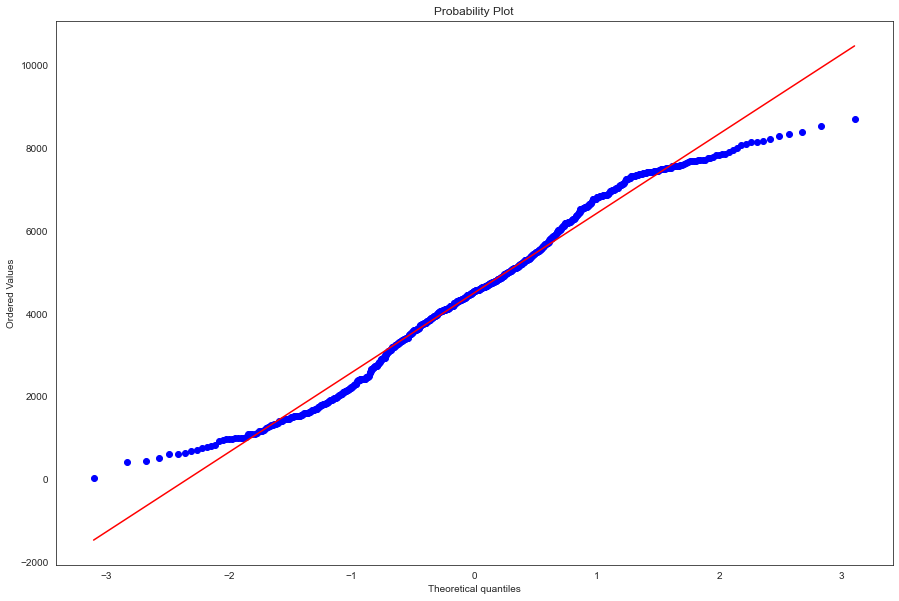

In [ ]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,10))
stats.probplot(bike_data.cnt.tolist(),dist='norm',plot=plt)
plt.show()


- Perform aggregation (check how average ’cnt’ varies across
months, days, working days, and holidays),

In [ ]:
# The typical way of aggregation builds on a use of group by as we have seen in the previous examples

grouped = bike_data.groupby('cnt')

# As we can see, typically high quality requires higher alcohol level

grouped['cnt'].mean()

cnt
22        22.0
431      431.0
441      441.0
506      506.0
605      605.0
         ...  
8294    8294.0
8362    8362.0
8395    8395.0
8555    8555.0
8714    8714.0
Name: cnt, Length: 695, dtype: float64

In [ ]:
# The average of the cnt from the data
bike_data['cnt'].mean()

4508.006849315068

- Calculate correlation of the variables.

In [ ]:
bike_data.corr()

,holiday,workingday,temp,hum,wind,registered,cnt,day
holiday,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.109142,-0.068764,0.004536
workingday,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.305437,0.062542,0.000484
temp,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.539436,0.627044,0.081898
hum,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.089212,-0.098543,0.096106
wind,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.217915,-0.235132,-0.027370
registered,-0.109142,0.305437,0.539436,-0.089212,-0.217915,1.000000,0.945411,0.040821
cnt,-0.068764,0.062542,0.627044,-0.098543,-0.235132,0.945411,1.000000,0.041484
day,0.004536,0.000484,0.081898,0.096106,-0.027370,0.040821,0.041484,1.000000


In [ ]:
# correlation of Rental Bikes vs the rest variables
bike_data.drop('cnt', axis=1).corrwith(bike_data.cnt)

holiday      -0.068764
workingday    0.062542
temp          0.627044
hum          -0.098543
wind         -0.235132
registered    0.945411
day           0.041484
dtype: float64

<AxesSubplot:>

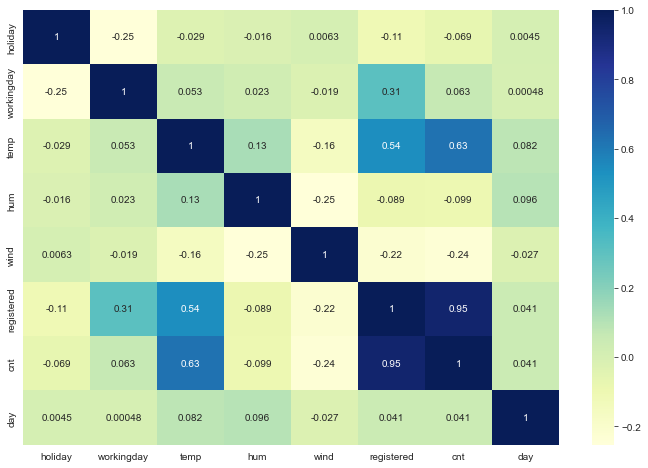

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(bike_data.corr(), annot=True, cmap="YlGnBu")

b) Develop a regression model that the company can use to predict the count of total rental bikes. Start
with all the variables included in the data file, then follow the process suggested in the lectures to
remove variables as long as you still find the model performance acceptable

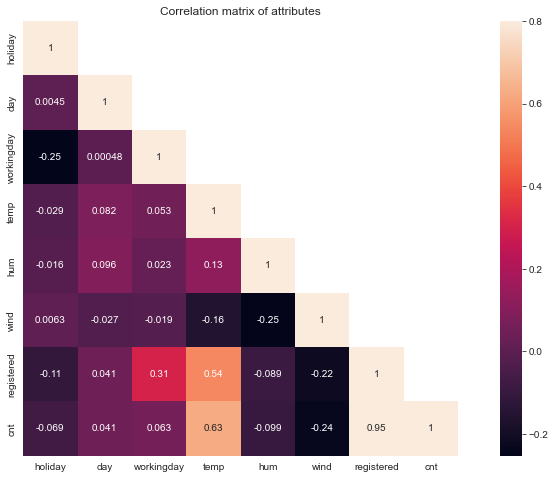

In [ ]:
#Create the correlation matrix
correMtr=bike_data[["season","month","holiday","day","weekday","workingday","weather","temp","hum","wind","registered","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()


In [ ]:
# Structure, missing values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   month       730 non-null    object 
 2   holiday     730 non-null    int64  
 3   weekday     625 non-null    object 
 4   workingday  730 non-null    int64  
 5   weather     730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   wind        730 non-null    float64
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [ ]:
# Correlation, it seems registered are highly correlated variable
bike_data.corr()['cnt']

holiday      -0.068764
workingday    0.062542
temp          0.627044
hum          -0.098543
wind         -0.235132
registered    0.945411
cnt           1.000000
day           0.041484
Name: cnt, dtype: float64

In [ ]:
# Create predictor and target
bike_X=bike_data[['holiday', 'workingday', 'temp', 'hum', 'wind', 'day']]
bike_y=bike_data[['cnt']]

In [ ]:
# Create the regression model

reg = sm.add_constant(bike_X)
est = sm.OLS(bike_y, reg)
est_fit = est.fit()

# We can create a perfect model using only one predictor variable
# It seems in the area only the size of the real estate is important
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           3.03e-94
Time:                        13:55:58   Log-Likelihood:                -6333.2
No. Observations:                 730   AIC:                         1.268e+04
Df Residuals:                     723   BIC:                         1.271e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4045.6043    351.835     11.499      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 8 coefficient values:

const       4045.6043    
holiday      -561.7190   
workingday    77.6145  
temp         160.6634   
hum          -31.0531   
wind         -71.7219   
day           1.6177  

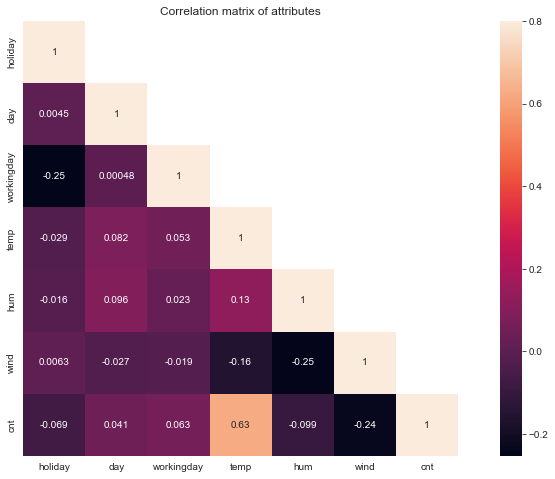

In [ ]:
#Create the correlation matrix
correMtr=bike_data[["season","month","holiday","day","weekday","workingday","weather","temp","hum","wind","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [ ]:
correMtr.corr()

,holiday,day,workingday,temp,hum,wind,cnt
holiday,1.000000,-0.119308,-0.599983,-0.268275,-0.116961,0.011611,-0.264720
day,-0.119308,1.000000,-0.156859,-0.092869,0.060301,-0.162533,-0.096714
workingday,-0.599983,-0.156859,1.000000,-0.052089,-0.055396,-0.102907,0.012340
temp,-0.268275,-0.092869,-0.052089,1.000000,0.028507,-0.534765,0.861026
hum,-0.116961,0.060301,-0.055396,0.028507,1.000000,-0.509578,-0.200451
wind,0.011611,-0.162533,-0.102907,-0.534765,-0.509578,1.000000,-0.519007
cnt,-0.264720,-0.096714,0.012340,0.861026,-0.200451,-0.519007,1.000000


Some other plots, such as boxplot, but I would just conclude to 'registered' as the only predictor based on this dataset

c)By looking at the coefficients of your final model, would you say that, in general, the company will
need more bikes: (i) on working days or non-working days; (ii) on a day when temperature is 20 or
on a day when temperature is 25?

In [ ]:
# Create the new dataframe for the chosen variables
#• workingday : 1, if day is neither weekend nor holiday is 1, and 0 otherwise
built_data=bike_data[['workingday', 'temp', 'cnt']]
built_data

,workingday,temp,cnt
0,0,14.110847,985
1,0,14.902598,801
2,1,8.050924,1349
3,1,8.200000,1562
4,1,9.305237,1600
...,...,...,...
725,1,10.420847,2114
726,1,10.386653,3095
727,0,10.386653,1341
728,0,10.489153,1796


In [ ]:
# Create the train and test set
#Training set: bIke_X: workingday, temp
# Test set: bIke_Y: cnt
bIke_X, bIke_Y= built_data[['workingday', 'temp']], built_data['cnt']

In [ ]:
# Get the instance
from sklearn import linear_model
bIke_model= linear_model.LinearRegression()

In [ ]:
#Train the model with training set
bIke_model.fit(bIke_X, bIke_Y)

LinearRegression()

In [ ]:
#The coefficient and intercept
print('Bike intercept:', bIke_model.intercept_)
print('Bike coefficient:',bIke_model.coef_)

Bike intercept: 1147.4569242318398
Bike coefficient: [121.03723683 161.315601  ]


In [ ]:
# First five prediction
model_predict= bIke_model.predict(bIke_X)
model_predict

array([3423.75668869, 3551.4784771 , 2567.23380475, 2591.28208928,
       2769.57406019, 2620.03949884, 2568.27880721, 2238.75696501,
       2062.3830366 , 2266.09451895, 2386.85182892, 2410.90011345,
       2359.79420185, 2332.47863113, 2690.70730251, 2679.68847906,
       2310.40577314, 2701.51662128, 3200.91536176, 2999.14390513,
       2442.46844736, 1538.54182079, 1785.84562209, 1912.63434083,
       2746.56416418, 2707.026033  , 2558.21239108, 2614.28537136,
       2447.24157038, 2579.5203632 , 2464.51270818, 2539.52139765,
       2988.11846775, 2505.01647455, 2666.04606299, 2690.70730251,
       3037.93913366, 3065.28330154, 2729.07029383, 2159.94078771,
       2223.20312038, 2519.13062174, 2619.05849437, 3240.91432731,
       4013.27911212, 3028.37751835, 3373.45320518, 4151.06731666,
       4718.76821181, 3787.52336895, 3033.86494684, 3153.68307738,
       2473.69947035, 2735.06252314, 3223.91864383, 3678.26984142,
       3015.89487284, 3419.19968427, 3962.17320051, 3032.21360

In [ ]:
#with statmodels to produce the result of regression model
import statsmodels.api as sm
X_2= sm.add_constant(bIke_X)
est_b= sm.OLS(bIke_Y, X_2)
est2_b= est_b.fit()
print(est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           8.34e-80
Time:                        13:55:59   Log-Likelihood:                -6377.4
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     727   BIC:                         1.277e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1147.4569    177.489      6.465      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


-> Based on the coeff, the changes of workingday and temp affect to the amount of bike rented

# QUESTION 2

In this assignment, your task is to create a classification model that can predict whether a
client of a bank will positively respond to a marketing campaign and invest some amount of money. The
data is in the file ’bank.csv’, and contains the following information about the client:

• age: age of the client in years

• job: type of job of the client, 11 possible categories

• marital: marital status, 3 possible categories

• education: highest level of education, 6 possible categories

• balance: average yearly balance

• housing: whether the client has housing loan (1 or 0)

• loan: whether the client has personal loan (1 or 0)

• day: day of month when the client was contacted the last time about the campaign

• month: month when the client was contacted the last time about the campaign, values 1-12

• duration: the duration of the last contact by phone, in seconds

• contact count: number of contacts performed during this campaign for the client

• previous: number of contacts performed in a previous campaign for the client

• outcome: whether the client has invested in the product advertised in the current campaign

You have to perform the following tasks:

In [ ]:
# Import the dataset
bank=pd.read_csv('bank.csv')
bank

,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,58,management,married,tertiary,2143,1,0,5,5,261,1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,0,0
3,35,management,married,tertiary,231,1,0,5,5,139,1,0,0
4,28,management,single,tertiary,447,1,1,5,5,217,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,technician,married,tertiary,825,0,0,17,11,977,3,0,1
43189,71,retired,divorced,primary,1729,0,0,17,11,456,2,0,1
43190,72,retired,married,secondary,5715,0,0,17,11,1127,5,3,1
43191,57,blue-collar,married,secondary,668,0,0,17,11,508,4,0,0


In [ ]:
# Check the data
bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,58,management,married,tertiary,2143,1,0,5,5,261,1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,0,0
3,35,management,married,tertiary,231,1,0,5,5,139,1,0,0
4,28,management,single,tertiary,447,1,1,5,5,217,1,0,0


In [ ]:
# Summary of numeric variables
bank.describe()

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,0.562406,0.164541,15.809414,6.151483,258.323409,2.758178,0.584863,0.116246
std,10.512640,3042.103625,0.496096,0.370770,8.305970,2.409781,258.162006,3.063987,2.332672,0.320523
min,18.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,71.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,442.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1412.000000,1.000000,0.000000,21.000000,8.000000,318.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,58.000000,275.000000,1.000000


In [ ]:
# Check missing value
bank.isnull().sum()

age              0
job              0
marital          0
education        0
balance          0
housing          0
loan             0
day              0
month            0
duration         0
contact_count    0
previous         0
outcome          0
dtype: int64

RESULT:
    From the result we can be assured that our data have no missing value and are good to go

In [ ]:
#Scale Numeric Data

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'contact_count', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

df_bank_ready.head()



,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,1.639561,management,married,tertiary,0.259354,1,0,-1.301418,5,261,-0.573827,-0.25073,0
1,0.307816,technician,single,secondary,-0.435568,1,0,-1.301418,5,151,-0.573827,-0.25073,0
2,-0.738556,entrepreneur,married,secondary,-0.444443,1,1,-1.301418,5,76,-0.573827,-0.25073,0
3,-0.548306,management,married,tertiary,-0.369166,1,0,-1.301418,5,139,-0.573827,-0.25073,0
4,-1.214179,management,single,tertiary,-0.298161,1,1,-1.301418,5,217,-0.573827,-0.25073,0


we will scale our numerical data to avoid outlier presence that can significantly affect our model.

a) Perform one-hot encoding on the categorical columns job, marital and education

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use OneHotEncoder() provided by sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['outcmaetiome'] = df_bank_ready['outcome'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)


df_bank_ready.head()

Shape of dataframe: (43193, 28)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,balance,housing,loan,day,month,duration,contact_count,previous,outcome,outcmaetiome
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.259354,1,0,-1.301418,5,261,-0.573827,-0.25073,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.435568,1,0,-1.301418,5,151,-0.573827,-0.25073,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.444443,1,1,-1.301418,5,76,-0.573827,-0.25073,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.369166,1,0,-1.301418,5,139,-0.573827,-0.25073,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.298161,1,1,-1.301418,5,217,-0.573827,-0.25073,0,0


b) Check the histograms of the columns balance, duration and contact count. If you think there are
outliers in the data, remove them.

- An outlier is an observation that lies outside the overall pattern of a distribution (Moore and McCabe 1999). Usually, the presence of an outlier indicates some sort of problem. This can be a case which does not fit the model under study, or an error in measurement.
- Outliers are often easy to spot in histograms. For example, the point on the far left in the above figure is an outlier.
- A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.




In [ ]:
bank[['balance', 'duration', 'contact_count']].describe()

,balance,duration,contact_count
count,43193.000000,43193.000000,43193.000000
mean,1354.027342,258.323409,2.758178
std,3042.103625,258.162006,3.063987
min,-8019.000000,0.000000,1.000000
25%,71.000000,103.000000,1.000000
50%,442.000000,180.000000,2.000000
75%,1412.000000,318.000000,3.000000
max,102127.000000,4918.000000,58.000000


<AxesSubplot:ylabel='Frequency'>

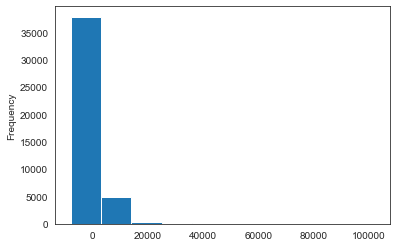

In [ ]:
bank['balance'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

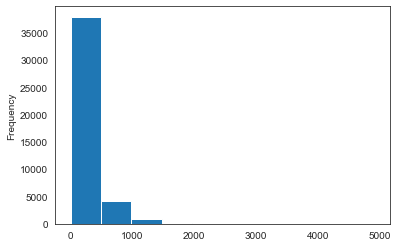

In [ ]:
bank['duration'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

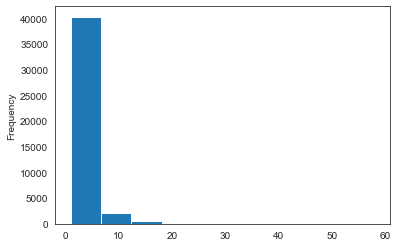

In [ ]:
bank['contact_count'].plot.hist()

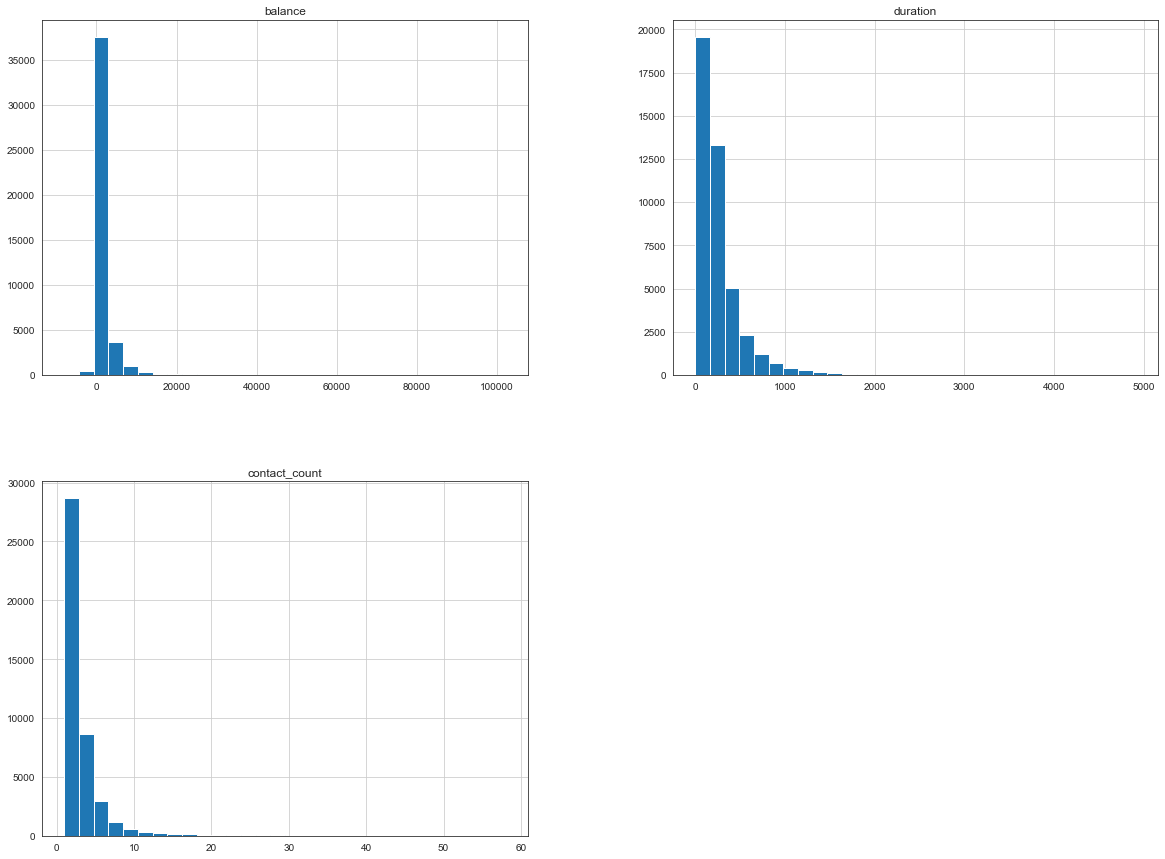

In [ ]:
bank[['balance','duration','contact_count']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()


In [ ]:
bank_group=bank[['balance','duration','contact_count']]
bank_group.describe()

,balance,duration,contact_count
count,43193.000000,43193.000000,43193.000000
mean,1354.027342,258.323409,2.758178
std,3042.103625,258.162006,3.063987
min,-8019.000000,0.000000,1.000000
25%,71.000000,103.000000,1.000000
50%,442.000000,180.000000,2.000000
75%,1412.000000,318.000000,3.000000
max,102127.000000,4918.000000,58.000000


In [ ]:
bank_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   balance        43193 non-null  int64
 1   duration       43193 non-null  int64
 2   contact_count  43193 non-null  int64
dtypes: int64(3)
memory usage: 1012.5 KB


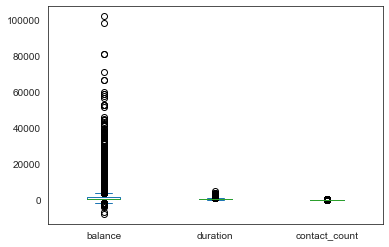

In [ ]:
# I  would say that using the boxplot function of pandas is one of the best tools to visualize the outliers.
bank_group.plot(kind = 'box', sharex = False, sharey = False) 
plt.show() 

In [ ]:
cols = ['balance','duration'] # one or more

Q1 = bank_group[cols].quantile(0.25)
Q3 = bank_group[cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR


bank_group_out= bank_group[((bank_group[cols] < lower_bound) |(bank_group[cols] > upper_bound)).any(axis=1)]
bank_group_out



,balance,duration,contact_count
30,10635,336,1
33,-3,1666,1
38,529,1492,1
47,-76,787,1
51,179,1778,1
...,...,...,...
43173,3810,262,1
43181,1475,1166,3
43182,557,1556,4
43188,825,977,3


In [ ]:
# Calculate lower_bound (Lower Limit) and upper_bound (Upper limit) value to remove outliers

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

print('Upper Limit to detect outliers :- ',lower_bound)
print('Upper Limit to detect outliers :- ',upper_bound)



Upper Limit to detect outliers :-  balance    -1940.5
duration    -219.5
dtype: float64
Upper Limit to detect outliers :-  balance     3423.5
duration     640.5
dtype: float64


In [ ]:
print('Original data set shape :-',bank.shape)
print('Removed outlier data set shape :- ',bank_group_out.shape)


Original data set shape :- (43193, 13)
Removed outlier data set shape :-  (7268, 3)


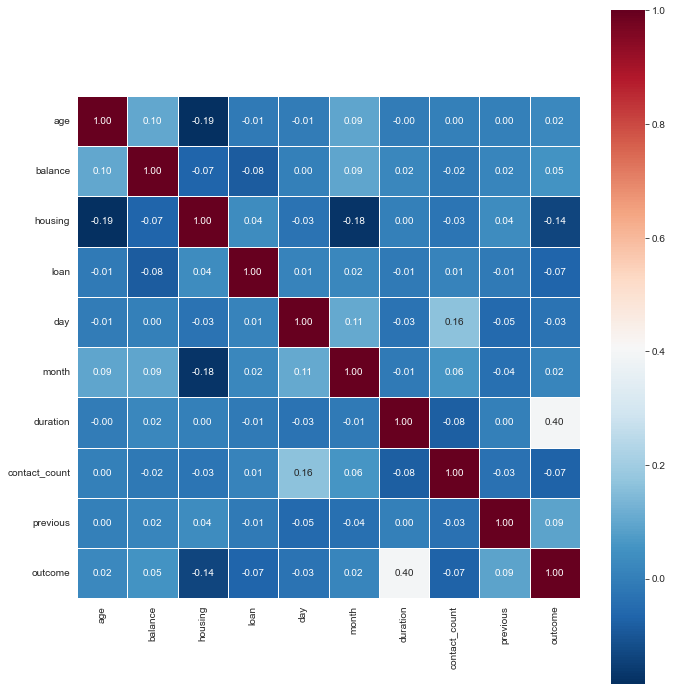

In [ ]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(bank._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

Most of our features are category type; hence, this heatmap does not help much. We can see that duration is a good indicator, however, this value has only known when the call is done.


c) Build a logistic regression classification model with ’outcome’ column as the target, and using all other
variables as predictors. Divide the data set into training (75 %) and test set (25 %), use random state
= 0, and follow the process of building a classification model as discussed in the course. (Hint: if
you encounter a warning, you can set the parameter max iter = 1000 within LogisticRegression()).

Although "duration" feature highly affects the output target, this value is not known before a call is performed. Hence; this feature should been discarded from the list of features to predict

In [ ]:
bank.outcome.value_counts()

0    38172
1     5021
Name: outcome, dtype: int64

In [ ]:
# Create data for model building

X = bank[['balance', 'housing', 'loan', 'day', 'month','duration', 'contact_count', 'previous']]
y = bank.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,balance,housing,loan,day,month,duration,contact_count,previous
20409,2074,0,0,18,8,244,2,0
32542,4,1,0,30,4,311,1,0
33161,5314,1,0,5,5,200,3,0
17915,355,0,0,4,8,340,1,0
23126,1701,1,1,17,11,381,1,2
...,...,...,...,...,...,...,...,...
32103,603,1,0,20,4,590,3,0
30403,4661,0,0,8,4,114,1,0
21243,1898,0,0,21,8,159,1,0
42613,15,0,1,22,8,4,1,0


In [ ]:
# Creating the model
logistic_regression = LogisticRegression (solver = 'lbfgs',max_iter=1000)
model_new= logistic_regression.fit(X_train, y_train)

# Predict for train and test set

y_train_predict = logistic_regression.predict(X_train)
y_test_predict = logistic_regression.predict(X_test)

# Print results

print(metrics.classification_report(y_train, y_train_predict))

print(metrics.classification_report(y_test, y_test_predict))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     28595
           1       0.57      0.20      0.30      3799

    accuracy                           0.89     32394
   macro avg       0.74      0.59      0.62     32394
weighted avg       0.86      0.89      0.86     32394

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9577
           1       0.53      0.18      0.27      1222

    accuracy                           0.89     10799
   macro avg       0.72      0.58      0.60     10799
weighted avg       0.86      0.89      0.86     10799



d) Create the confusion matrix, calculate classification performance measures. What is the accuracy of
the model on the test set?

Again, c) question shows the confusion classification performance measures and the accuracy of
the model on the test set. Again, I check separately to gain the clearer result

In [ ]:
from sklearn.metrics import confusion_matrix
#Classification performance measures
metrics.confusion_matrix(y_test, y_test_predict)

array([[9384,  193],
       [1002,  220]])

In [ ]:
check_train= metrics.classification_report(y_train, y_train_predict)
print(check_train)
#check the accuracy of test set
check_test= metrics.classification_report(y_test, y_test_predict)
print(check_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     28595
           1       0.57      0.20      0.30      3799

    accuracy                           0.89     32394
   macro avg       0.74      0.59      0.62     32394
weighted avg       0.86      0.89      0.86     32394

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9577
           1       0.53      0.18      0.27      1222

    accuracy                           0.89     10799
   macro avg       0.72      0.58      0.60     10799
weighted avg       0.86      0.89      0.86     10799



e) Does the model perform similarly for the two possible categories of ’outcome’, i.e. for positive and
negative class? If not, do you think it is a problem? How many false negatives do you find, i.e.
clients who would invest in the advertised product but the model predicts that they would not?

In [ ]:
X.head()

,balance,housing,loan,day,month,duration,contact_count,previous
0,2143,1,0,5,5,261,1,0
1,29,1,0,5,5,151,1,0
2,2,1,1,5,5,76,1,0
3,231,1,0,5,5,139,1,0
4,447,1,1,5,5,217,1,0


# QUESTION 3

In this exercise you have to work with the data in the file ’patients.csv’, that contains some
measurements about patients, who experienced angina, which can typically be a symptom of coronary
artery disease. You can find the following variables in the data:

    • age: age of the patient

    • gender: gender of the patient (0 - female, 1 - male)

    • pain: intensity of the chest pain (integer value, 0-3)

    • blood pressure: blood pressure of the patient

    • cholesterol: cholesterol in blood, mg/dl

    • blood sugar: indicating whether the blood sugar level is normal or not (1 when it is above 120 mg/dl,
and 0 otherwise)

    • heart rate: maximum heart rate

    • exercise: whether the chest pain was induced by some physical exercise or not (1 or 0)

    • outcome: 1 for patients with heart attack, and 0 for patients who did not have heart attack

    Your task is to perform K-Means clustering on the dataset; in the model building process, do not use the
column ’outcome’. You need to perform the following steps:

In [ ]:
# Import the dataset
patients=pd.read_csv('patients.csv')
patients

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [ ]:
# Check the data
patients.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [ ]:
patients.columns

Index(['age', 'gender', 'pain', 'blood_pressure', 'cholesterol', 'blood_sugar',
       'heart_rate', 'exercise', 'outcome'],
      dtype='object')

--> This is the list of variables in the data

In [ ]:
#summary statistics 
patients.describe()


,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


--> By using summary statistics we can see the range or scale of values of all the features. For example, from the above data, we can see that the values in variable “Age” lie between [29, 77] and values in variable “Outcome” in between [0, 1] and so on. You can observe that all the attributes have values on a different scale.

So, we need to scale the data using data transformation techniques such as Data standardization and Normalization.

In [ ]:
# Data for clustering
patients_clust = patients.drop('outcome',axis=1)

# Scale data
patients_clust = patients_clust.apply(lambda x: preprocessing.scale(x))

a) Scale all the variables.

In [ ]:
patients_clust.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,0.015443,-0.696631
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,1.633471,-0.696631
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,0.977514,-0.696631
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,1.239897,-0.696631
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.583939,1.435481


In [ ]:
from sklearn.preprocessing import StandardScaler

data_standard_scaler = StandardScaler()
data_standard_scaler.fit(patients[['outcome']])
patients['outcome_scaled'] = data_standard_scaler.transform(patients[['outcome']])

patients.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome,outcome_scaled
0,63,1,3,145,233,1,150,0,1,0.914529
1,37,1,2,130,250,0,187,0,1,0.914529
2,41,0,1,130,204,0,172,0,1,0.914529
3,56,1,1,120,236,0,178,0,1,0.914529
4,57,0,0,120,354,0,163,1,1,0.914529


b) Determine the optimal number of clusters using the elbow method, and perform k-means clustering
with the chosen value (set random state = 0).

In [ ]:
# Determine the optimal number of clusters
pat_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(patients_clust)
    pat_clust.append(kmeans.inertia_)

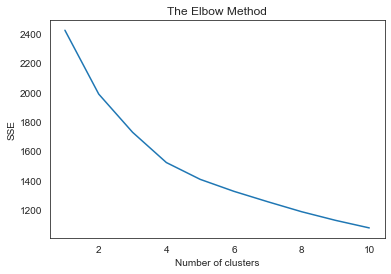

In [ ]:
# Based on the plot, 3 clusters seems reasonable

plt.plot(range(1, 11), pat_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

It seems like that the n_cluster might be around 4. In this case I will choose 4 for the n_cluster value

In [ ]:
# Create the model Kmeans and predict 
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(patients_clust)
y_cluster= kmeans.fit_predict(patients_clust)
y_cluster

array([0, 2, 2, 2, 1, 3, 3, 2, 0, 2, 3, 3, 2, 1, 0, 2, 3, 3, 2, 3, 3, 2,
       2, 0, 2, 3, 0, 2, 0, 0, 2, 3, 2, 2, 1, 2, 0, 2, 3, 3, 3, 2, 1, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 3, 3, 0,
       2, 3, 0, 1, 2, 0, 2, 1, 3, 0, 2, 0, 2, 3, 3, 0, 2, 3, 0, 1, 2, 2,
       3, 0, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3,
       2, 2, 2, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 3, 3, 0, 0, 2, 3, 2, 1, 1,
       0, 3, 1, 1, 1, 3, 3, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 0,
       1, 3, 2, 1, 1, 0, 3, 1, 1, 3, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 3, 0,
       3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 2, 0, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 1, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 3, 1, 2, 1, 2, 1, 3, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 3, 1, 1, 3, 3, 0, 3, 1, 1, 1, 0, 1, 2, 0,

c) What is the average of each variable in each cluster (the original, not the scaled variables)?

In [ ]:
# Number of observations in clusters
pd.Series(y_cluster).value_counts()

2    97
3    82
1    79
0    45
dtype: int64

In [ ]:
# Variable means for clusters

patients.groupby(y_cluster).mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome,outcome_scaled
0,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,149.177778,0.355556,0.511111,-0.067154
1,56.569620,0.822785,0.215190,131.177215,249.506329,0.0,131.430380,0.962025,0.189873,-0.712195
2,45.927835,0.752577,1.391753,123.360825,227.309278,0.0,165.340206,0.061856,0.773196,0.459109
3,60.780488,0.439024,1.060976,137.743902,264.658537,0.0,148.890244,0.012195,0.634146,0.179899


d) Can you identify some variables that clearly have different average values for the clusters?

In [ ]:
# As we can see, clustering almost perfectly identified the different level of outcome (1 for patients with heart attack, and 0 for patients who did not have heart attack) there are only some misclassifications in 

pd.crosstab(patients.outcome, y_cluster)

col_0,0,1,2,3
outcome,,,,
0,22,64,22,30
1,23,15,75,52


e) Perform k-means clustering now with k=2 (if your chosen value was 2 in the analysis already, you can
continue with the previously created clusters). Compare the created two clusters to the ’outcome’
column. Do the created clusters separate patients who had heart attack from the other patients, or
are the two clusters a mix of not healthy (have heart attack) and healthy (no heart attack) patients?

In [ ]:
# Create the model Kmeans and predict 
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=0)
kmeans.fit(patients_clust)
y_cluster_1= kmeans.fit_predict(patients_clust)
y_cluster_1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler

data_standard_scaler = StandardScaler()
data_standard_scaler.fit(patients[['outcome']])
patients['outcome_scaled'] = data_standard_scaler.transform(patients[['outcome']])

patients.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome,outcome_scaled
0,63,1,3,145,233,1,150,0,1,0.914529
1,37,1,2,130,250,0,187,0,1,0.914529
2,41,0,1,130,204,0,172,0,1,0.914529
3,56,1,1,120,236,0,178,0,1,0.914529
4,57,0,0,120,354,0,163,1,1,0.914529


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array([[0], [1]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans.labels_

df = pd.DataFrame(data) 
df['outcome'] = kmeans.labels_

In [ ]:
pd.crosstab(patients.outcome, y_cluster)

col_0,0,1,2,3
outcome,,,,
0,22,64,22,30
1,23,15,75,52


In [87]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(heart_clust)

pd.crosstab(patients.outcome, y_clust)

NameError: name 'heart_clust' is not defined